In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("data/An_Cov.csv")
data

,ANALYST,DATE,BROKER,RATING,RECOMMENDATION,TARGET_PRICE,BBTICKER,GICS_SECTOR_NAME,GICS_INDUSTRY_GROUP_NAME
0,Jamrgett,3/5/2020,Beerg,5.0,buy,1.220000e+02,NESN SW Equity,Consumer Staples,"Food, Beverage & Tobacco"
1,Joneeney,3/3/2020,Corch,3.0,equalweight,1.050000e+02,NESN SW Equity,Consumer Staples,"Food, Beverage & Tobacco"
2,MarDeboo,3/2/2020,Jeies,3.0,hold,1.050000e+02,NESN SW Equity,Consumer Staples,"Food, Beverage & Tobacco"
3,Niclberg,3/1/2020,Lirum,3.0,hold,1.070000e+02,NESN SW Equity,Consumer Staples,"Food, Beverage & Tobacco"
4,Antpagna,2/27/2020,ISEVA,5.0,overweight,-2.420000e-14,NESN SW Equity,Consumer Staples,"Food, Beverage & Tobacco"
...,...,...,...,...,...,...,...,...,...
8671,Inghmidt,4/7/2016,Hasse,1.0,sell,-2.420000e-14,LHA GR Equity,Industrials,Transportation
8672,Xavaroen,3/9/2018,Br Co,3.0,neutral,8.800000e+01,BMW3 GR Equity,Consumer Discretionary,Automobiles & Components
8673,FraMaury,4/4/2016,OdBHF,2.0,reduce,8.900000e+01,BMW3 GR Equity,Consumer Discretionary,Automobiles & Components
8674,RenWeber,2/4/2020,Ba AG,3.0,hold,5.000000e+01,UHRN SW Equity,Consumer Discretionary,Consumer Durables & Apparel


In [4]:
len(data["BBTICKER"].unique())

360

In [5]:
data["DATE"] = pd.to_datetime(data["DATE"])
data["DATE"].sort_values()

3250   2014-03-06
1710   2015-04-02
2800   2015-04-20
7945   2015-04-27
3371   2015-06-15
          ...    
1479   2020-03-09
1444   2020-03-09
6833   2020-03-09
931    2020-03-09
2117   2020-03-09
Name: DATE, Length: 8676, dtype: datetime64[ns]

In [6]:
(data["BBTICKER"].unique()).tolist()

['NESN SW Equity',
 'ROG SW Equity',
 'NOVN SW Equity',
 'HSBA LN Equity',
 'SAP GR Equity',
 'AZN LN Equity',
 'ASML NA Equity',
 'SAN FP Equity',
 'MC FP Equity',
 'FP FP Equity',
 'BP/ LN Equity',
 'NOVOB DC Equity',
 'GSK LN Equity',
 'BATS LN Equity',
 'RDSA LN Equity',
 'ALV GR Equity',
 'DGE LN Equity',
 'UNA NA Equity',
 'RDSB LN Equity',
 'SIE GR Equity',
 'IBE SM Equity',
 'AIR FP Equity',
 'BAYN GR Equity',
 'OR FP Equity',
 'ENEL IM Equity',
 'ULVR LN Equity',
 'AI FP Equity',
 'ZURN SW Equity',
 'SU FP Equity',
 'RB/ LN Equity',
 'SAN SM Equity',
 'BAS GR Equity',
 'DTE GR Equity',
 'DG FP Equity',
 'BNP FP Equity',
 'NG/ LN Equity',
 'ADS GR Equity',
 'REL LN Equity',
 'VOD LN Equity',
 'ABI BB Equity',
 'RIO LN Equity',
 'SAF FP Equity',
 'BN FP Equity',
 'CS FP Equity',
 'LLOY LN Equity',
 'ABBN SW Equity',
 'PRU LN Equity',
 'KER FP Equity',
 'EL FP Equity',
 'UBSG SW Equity',
 'PHIA NA Equity',
 'MUV2 GR Equity',
 'BHP LN Equity',
 'RI FP Equity',
 'ISP IM Equity',
 '

1. Which company has the higher analyst coverage? (Look at histogram) [Question 1](#Q1)
2. Which analyst covers the most companies? (Look at histogram) [Question 2](#Q2)
3. Based on how analysts organize themselves into covering companies,
a. Could you model the similarity or conversely, the distance matrix
between the companies based on this analyst co-coverage 
b. How would the results change if you were to restrict the dataset to
only analysts having companies covered within 1s.d. of the
distribution found in Qn. 2? 
c. If further restricted to a smaller subset? 
[Question 3a](#Q3a)
[Question 3b](#Q3b)
[Question 3c](#Q3c)
4. Which sectors are the most heterogenous? (Look at the clusters formed
by industry groups per sector – use t-SNE to visualize) [Question 4](#Q4)
1. Similarly, which sectors are the most homogenous?
2. What type of companies tend to be outliers in terms of the clusters?
3. Feel free to explore and provide deeper insights in the structure of the
clusters/network as part of the outputs. (This is covered by Fernando as how to purely use price to perform HRP)


# <a id="Q1">Question 1</a>

In [7]:
q1 = data.groupby("BBTICKER")["ANALYST"].count()
q1 = q1.sort_values(ascending = False)
q1

BBTICKER
ADS GR Equity      44
SAP GR Equity      42
ASML NA Equity     41
AZN LN Equity      40
MC FP Equity       38
                   ..
HEIO NA Equity      5
RYAAY US Equity     5
RO SW Equity        3
UHRN SW Equity      2
BMW3 GR Equity      2
Name: ANALYST, Length: 360, dtype: int64

(array([ 7.,  6., 18., 33., 85., 97., 55., 41., 14.,  4.]),
 array([ 2. ,  6.2, 10.4, 14.6, 18.8, 23. , 27.2, 31.4, 35.6, 39.8, 44. ]),
 <BarContainer object of 10 artists>)

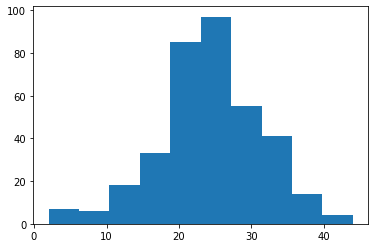

In [8]:
plt.hist(q1.values)

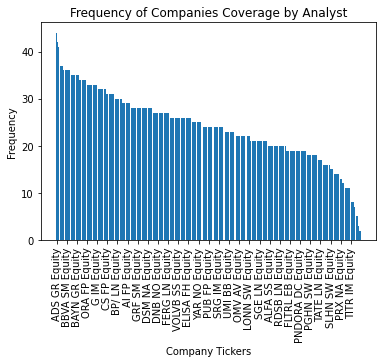

In [9]:
# Set the desired number of labels to display
num_labels = 30

# Get a subset of labels to display
display_labels = q1.index[::len(q1)//num_labels]

# Plot the histogram
plt.bar(range(len(q1)), q1.values)

# Customize x-axis labels
plt.xticks(range(0, len(q1), len(q1)//num_labels), display_labels, rotation=90)

# Set labels and title
plt.xlabel('Company Tickers')
plt.ylabel('Frequency')
plt.title('Frequency of Companies Coverage by Analyst')

# Display the histogram
plt.show()

# <a id="Q2">Question 2</a>

In [35]:
q2 = data.groupby("ANALYST")["BBTICKER"].count()
q2 = q2.sort_values(ascending = False)
q2

ANALYST
Antpagna    206
Valtaldy    162
Teaerage     44
Svemeier     38
Casy Lea     36
           ... 
Aymarodi      1
Mat Liss      1
MatYoung      1
Matdberg      1
Jos Beck      1
Name: BBTICKER, Length: 2065, dtype: int64

In [36]:
q2.std()

6.592447656633336

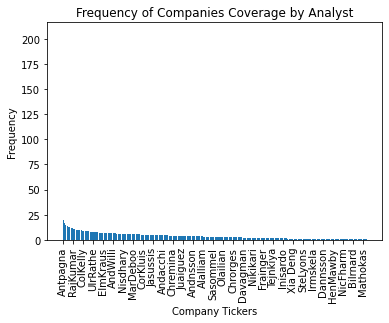

In [37]:
# Set the desired number of labels to display
num_labels = 30

# Get a subset of labels to display
display_labels = q2.index[::len(q2)//num_labels]

# Plot the histogram
plt.bar(range(len(q2)), q2.values)

# Customize x-axis labels
plt.xticks(range(0, len(q2), len(q2)//num_labels), display_labels, rotation=90)

# Set labels and title
plt.xlabel('Company Tickers')
plt.ylabel('Frequency')
plt.title('Frequency of Companies Coverage by Analyst')

# Display the histogram
plt.show()

In [171]:
q3 = pd.DataFrame(np.unique(data['ANALYST'], return_counts=True)).T
q3.columns = ['ANALYST', 'COUNT']
q3 = q3.set_index('ANALYST')['COUNT']
q3 = q3.sort_values(ascending=False)
q3 = q3[(q3<q3.quantile(0.90)) & (q3>q3.quantile(0.10))]
q3 = q3[(q3 < (q3.mean() + q3.std())) & (q3 > (q3.mean() - q3.std()))]
# analyst_count.plot.bar()
# analyst_count.mean() - analyst_count.std()
# analyst_count.mean() + analyst_count.std()
# analyst_count[analyst_count.mean()].std()
q3

ANALYST
Gerpisch    5
Jeae Fur    5
Giotalti    5
Jeatschy    5
Marlding    5
           ..
DavTogut    3
DavcCann    3
Davagman    3
Tansalik    3
Caradsen    3
Name: COUNT, Length: 697, dtype: object

In [180]:
q3_2 = q3[q3 == 4]

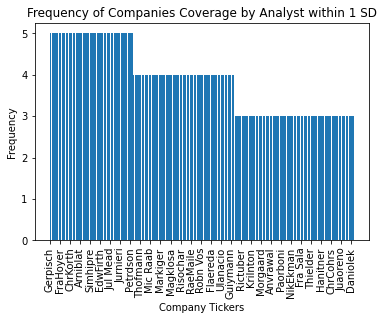

In [172]:
# Set the desired number of labels to display
num_labels = 30

# Get a subset of labels to display
display_labels = q3.index[::len(q3)//num_labels]

# Plot the histogram
plt.bar(range(len(q3)), q3.values)

# Customize x-axis labels
plt.xticks(range(0, len(q3), len(q3)//num_labels), display_labels, rotation=90)

# Set labels and title
plt.xlabel('Company Tickers')
plt.ylabel('Frequency')
plt.title('Frequency of Companies Coverage by Analyst within 1 SD')

# Display the histogram
plt.show()

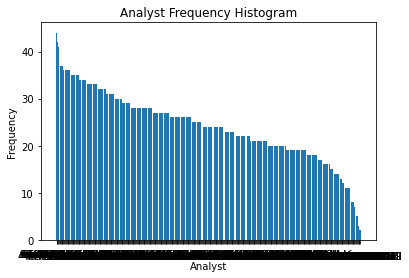

In [173]:
plt.bar(q1.index, q1.values)
plt.xlabel('Analyst')
plt.ylabel('Frequency')
plt.title('Analyst Frequency Histogram')
plt.xticks(rotation= 180)  # Rotate x-axis labels if needed
plt.show()


In [174]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.manifold import TSNE

In [175]:
def count(x): return x.unique().shape[0]

def unique_first(x): 
    value = x.unique()
    if value.shape[0] > 1:
        raise Exception
    return value[0]

In [176]:
def create_to_tsne_data(analyst_list, data, decompose=True):

    sub_data = data[data['ANALYST'].isin(analyst_list)]
    sub_data['GICS_INDUSTRY_GROUP_NAME']

    ana_ticker = sub_data[['ANALYST', 'BBTICKER']].copy()
    ana_ticker = ana_ticker[ana_ticker['ANALYST'].isin(q2.index)]
    ana_ticker['covered'] = True
    ana_ticker = ana_ticker.set_index(['BBTICKER', 'ANALYST']).sort_index()
    ana_ticker = ana_ticker[~ana_ticker.index.duplicated()]
    ana_ticker = ana_ticker.unstack().fillna(False).astype(int)
    ana_ticker.columns = ana_ticker.columns.droplevel(0)

    # ana_sector = sub_data[['ANALYST', 'GICS_SECTOR_NAME']].copy()
    # ana_sector = ana_sector[ana_sector['ANALYST'].isin(q2.index)]
    # ana_sector['covered'] = True
    # ana_sector = ana_sector.set_index(['GICS_SECTOR_NAME', 'ANALYST']).sort_index()
    # ana_sector = ana_sector[~ana_sector.index.duplicated()]
    # ana_sector = ana_sector.unstack().fillna(False).astype(int)
    # ana_sector.columns = ana_sector.columns.droplevel(0)

    # ana_industry = sub_data[['ANALYST', 'GICS_INDUSTRY_GROUP_NAME']].copy()
    # ana_industry = ana_industry[ana_industry['ANALYST'].isin(q2.index)]
    # ana_industry['covered'] = True
    # ana_industry = ana_industry.set_index(['GICS_INDUSTRY_GROUP_NAME', 'ANALYST']).sort_index()
    # ana_industry = ana_industry[~ana_industry.index.duplicated()]
    # ana_industry = ana_industry.unstack().fillna(False).astype(int)
    # ana_industry.columns = ana_industry.columns.droplevel(0)

    if decompose:

        decomposer = TruncatedSVD(ana_ticker.shape[1], random_state=420)
        reduced = decomposer.fit_transform(ana_ticker)
        to_tsne = pd.DataFrame(reduced, index=ana_ticker.index)

        plt.plot(decomposer.explained_variance_ratio_.cumsum())
        plt.grid()
        plt.show()

        return to_tsne
    else:
        return ana_ticker


# one_sd_tsne = create_to_tsne_data(q3.index, data)

In [177]:
from cycler import cycler

def plot_tsne(to_tsne, data):
    tsne_values = TSNE().fit_transform(to_tsne)

    aggregated_analyst_cov = data.groupby('BBTICKER').agg({'ANALYST': count, 
                                                            'BROKER': count,
                                                            'GICS_SECTOR_NAME': unique_first,
                                                            'GICS_INDUSTRY_GROUP_NAME': unique_first})

    gic_label = 'GICS_SECTOR_NAME'

    tsne_with_gic = pd.DataFrame(tsne_values, index=to_tsne.index).join(aggregated_analyst_cov[gic_label])

    fig, ax = plt.subplots(figsize=(16,8))
    ax.set_prop_cycle(cycler('color', plt.cm.tab20.colors))

    for gic, df in tsne_with_gic.groupby(gic_label):
        ax.scatter(df[0], df[1], label=gic)

    ax.set_xlim(ax.get_xlim()[0], ax.get_xlim()[1]+10)
    plt.legend()
    plt.show()

    gic_label = 'GICS_INDUSTRY_GROUP_NAME'

    tsne_with_gic = pd.DataFrame(tsne_values, index=to_tsne.index).join(aggregated_analyst_cov[gic_label])

    fig, ax = plt.subplots(figsize=(16,8))
    lots_of_color = cycler('color', plt.cm.tab20b.colors).concat(cycler('color', plt.cm.tab20c.colors))
    ax.set_prop_cycle(lots_of_color)

    for gic, df in tsne_with_gic.groupby(gic_label):
        ax.scatter(df[0], df[1], label=gic)

    ax.set_xlim(ax.get_xlim()[0], ax.get_xlim()[1]+10)
    plt.legend()
    plt.show()
    # df.plot.scatter(0,1, ax=ax, color='tab:red')


# <a id="Q3a">Q3 - Clusters using all analyst</a>

### The clusters distance are calculated by determining whether each analyst have covered this stocks, we assign 1 if yes, 0 if no. With 2000~ analysts, each stocks will have 2000 features of 1 and 0.

In [186]:
create_to_tsne_data(q2.index, data, False)

ANALYST,Aarn Guy,Abhpatra,Abhuluri,Abissain,Achtania,Achtmann,Ada Hull,Ada Wood,AdaFleck,AdaJonas,...,Yasuahri,Yi Zhong,Yoaenton,Yuen Low,Yuranych,Yveehead,Zaf Khan,Zafezgar,Zilaitis,Zuz Pusz
BBTICKER,,,,,,,,,,,,,,,,,,,,,
1COV GR Equity,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAL LN Equity,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
ABBN SW Equity,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ABF LN Equity,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ABI BB Equity,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WPP LN Equity,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
WRT1V FH Equity,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
WTB LN Equity,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


c:\Users\Miti\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\Miti\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


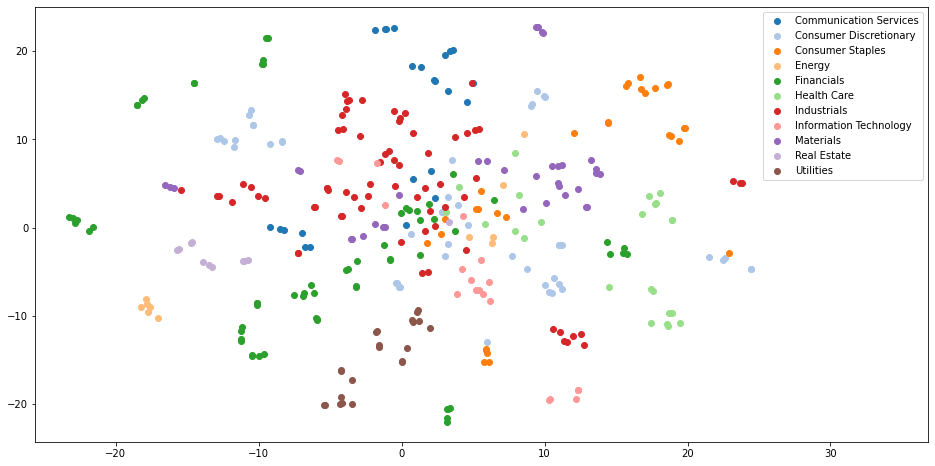

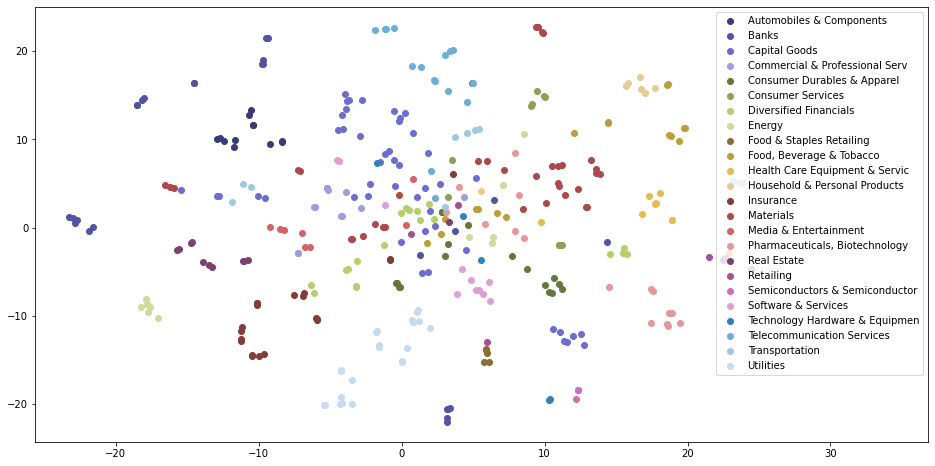

In [178]:
to_tsne = create_to_tsne_data(q2.index, data, False)
plot_tsne(to_tsne.iloc[:, :], data)

# <a id="Q3b">Q3 - Cluster using analyst who covers stocks within 1sd (after winsorize 10%)</a>

c:\Users\Miti\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\Miti\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


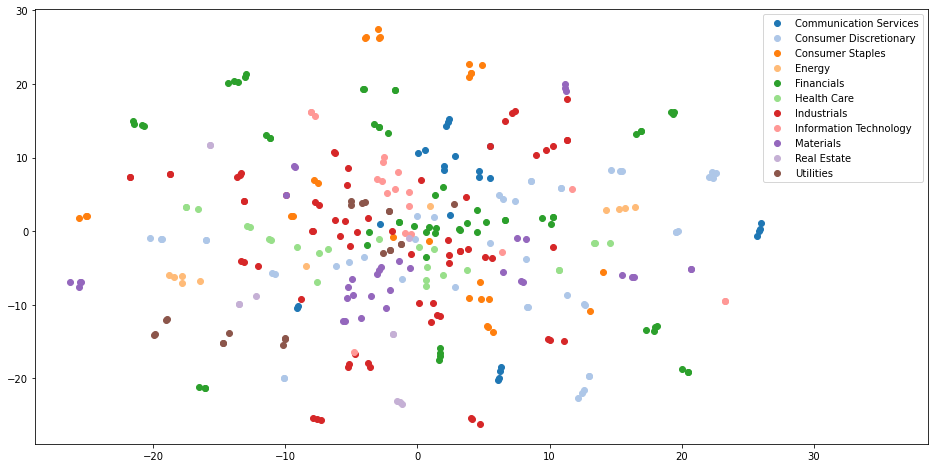

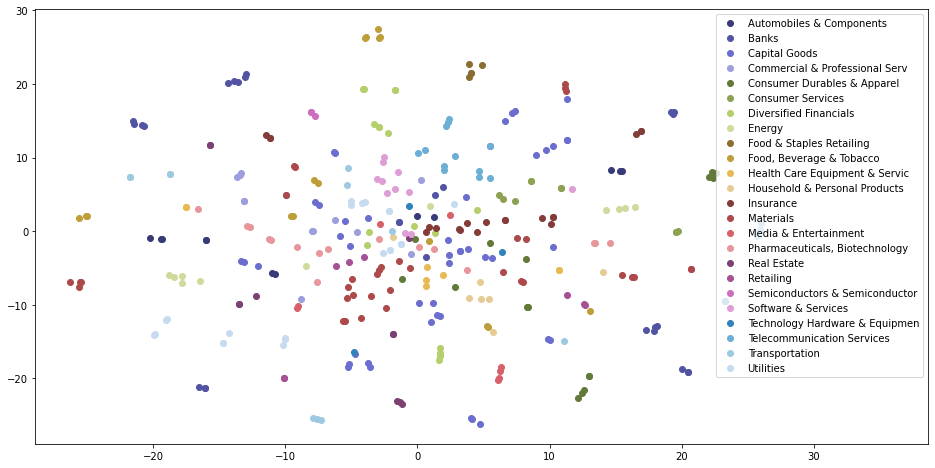

In [179]:
all_tsne = create_to_tsne_data(q3.index, data, False)
plot_tsne(all_tsne.iloc[:, :], data)

# <a id="Q3c">Q3 - Cluster using analyst who covers 4 stocks only (mode = 4)</a>

c:\Users\Miti\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\Miti\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


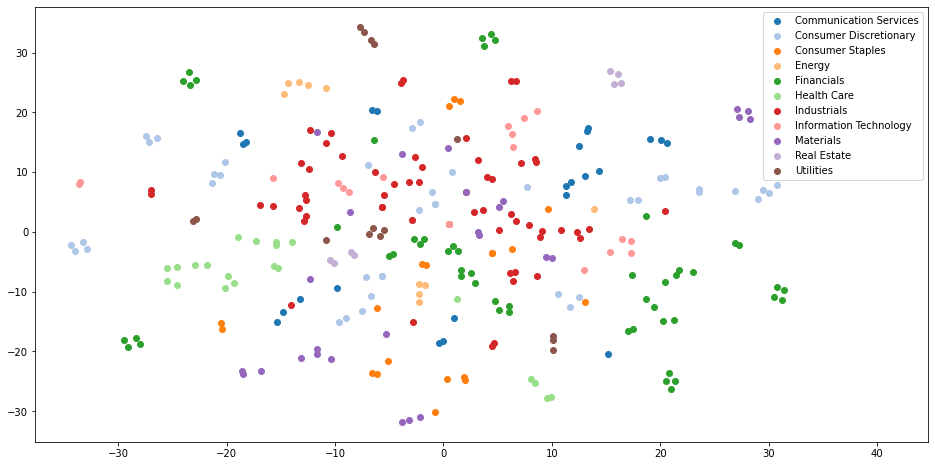

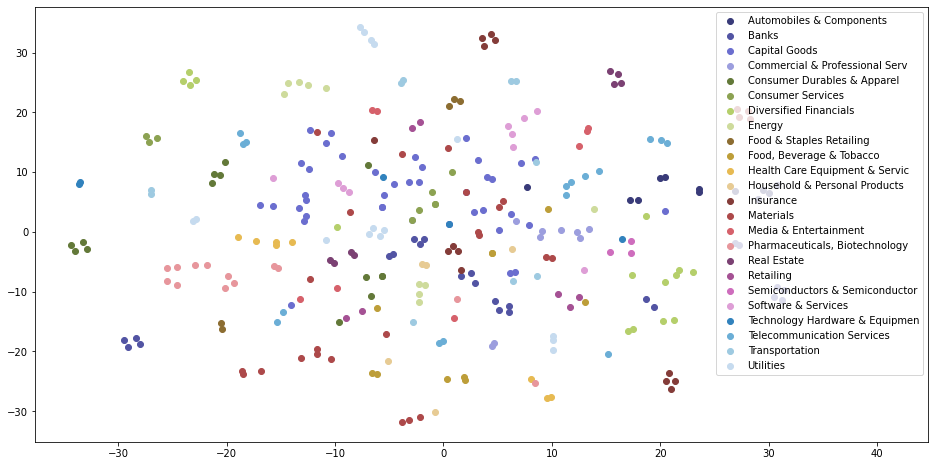

In [182]:
all_tsne = create_to_tsne_data(q3_2.index, data, False)
plot_tsne(all_tsne.iloc[:, :], data)

# q3 - Clusters by using truncatedSVD to automatically decompose the features

### 100 features seems to be a good sweet spot
#### Personal opinion from miti, this seems to be the best approach. The clusters are bigger and seems more 'organic'

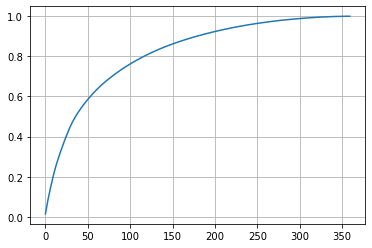

In [187]:
to_tsne = create_to_tsne_data(q2.index, data, True)

c:\Users\Miti\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\Miti\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


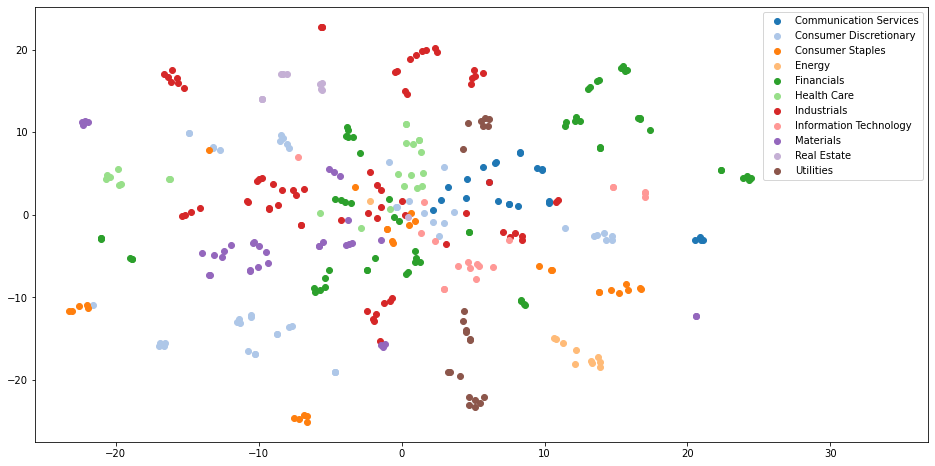

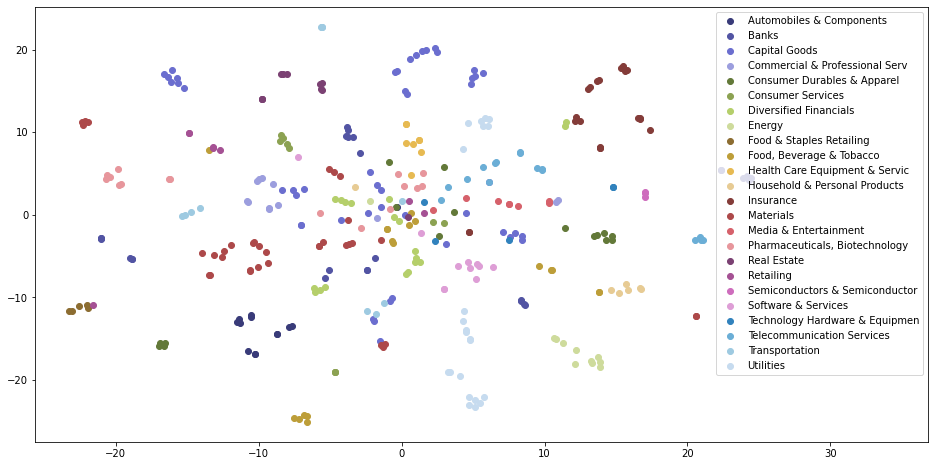

In [188]:
plot_tsne(to_tsne.iloc[:, :100], data)

# q3 - Clusters by using truncatedSVD to automatically decompose the features as well as limit analysts to 1sd / covered 4 stocks

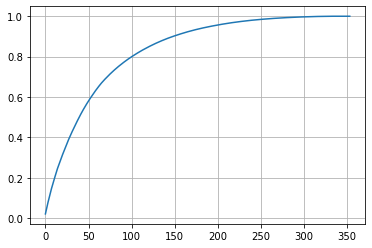

c:\Users\Miti\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\Miti\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


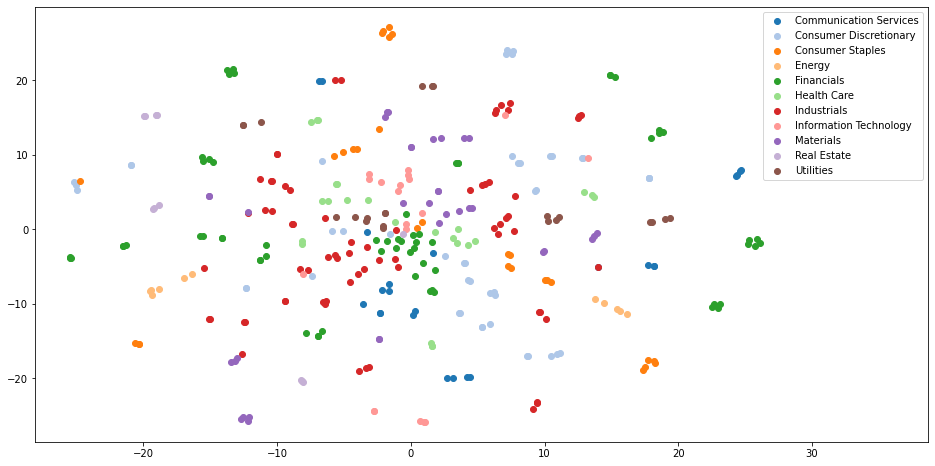

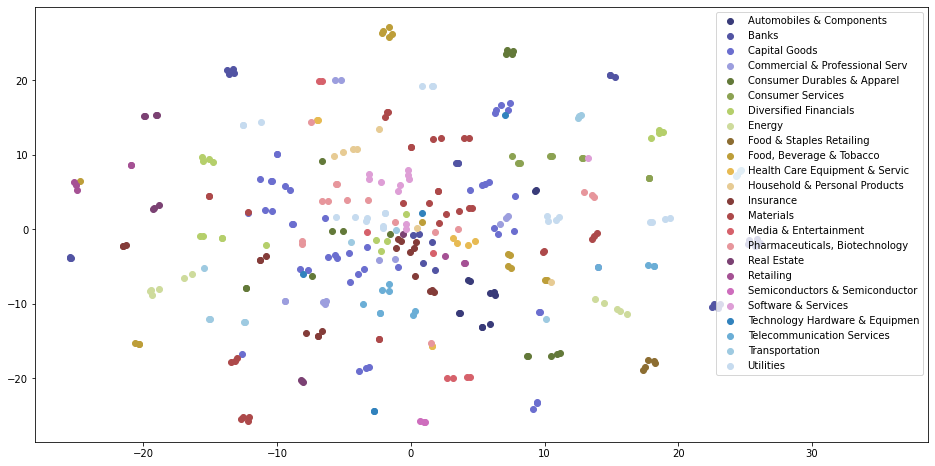

In [189]:
to_tsne = create_to_tsne_data(q3.index, data, True)
plot_tsne(to_tsne.iloc[:, :100], data)

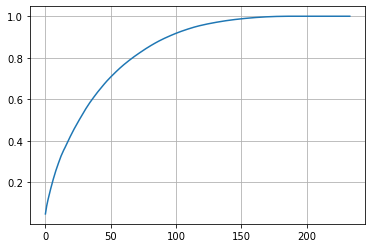

c:\Users\Miti\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\Miti\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


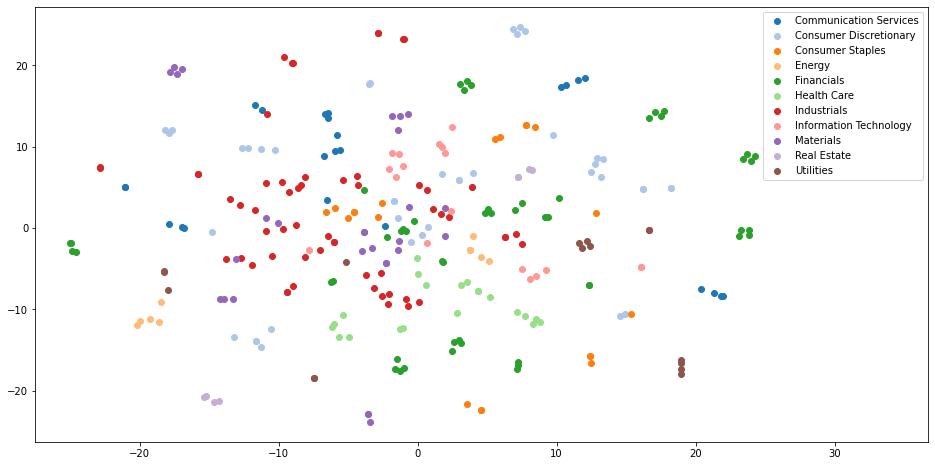

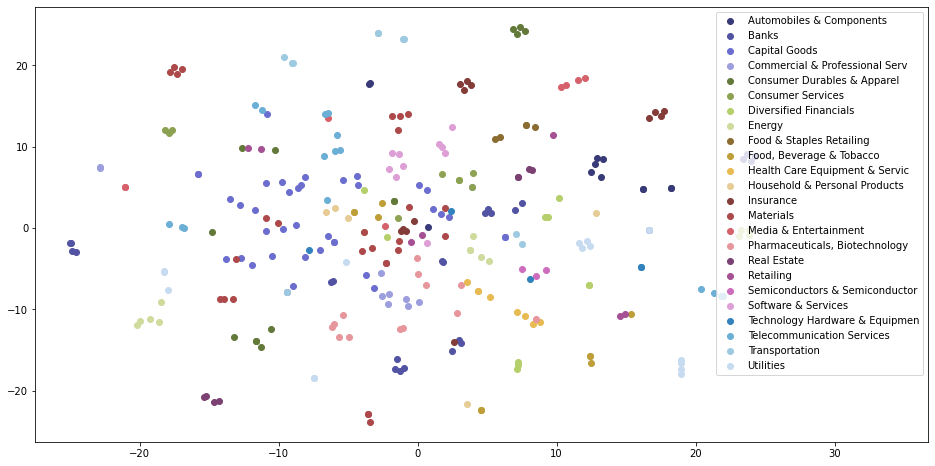

In [191]:
# using analyst who only covered 4 is really ugly
to_tsne = create_to_tsne_data(q3_2.index, data, True)
plot_tsne(to_tsne.iloc[:, :75], data)

# <a id="Q4">Q4,5,6 - using the all analyst with truncated SVD approach</a>

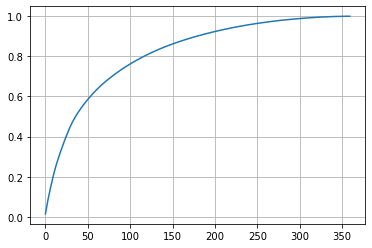

c:\Users\Miti\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\Miti\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


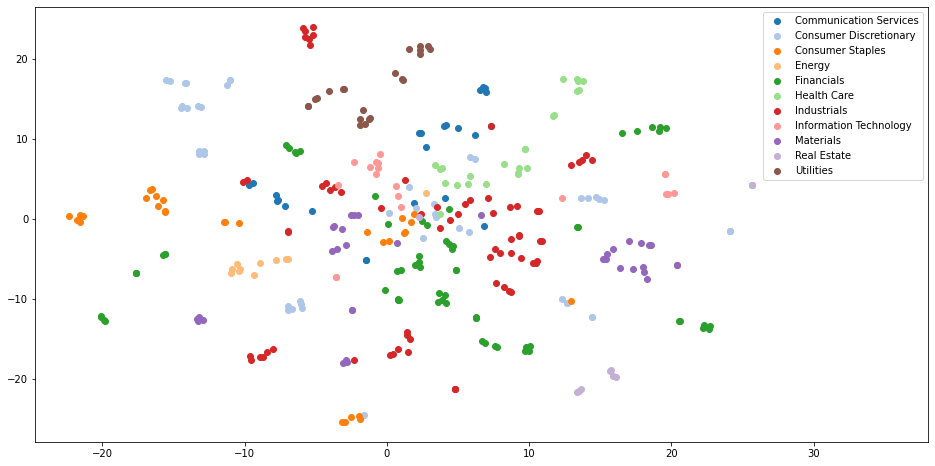

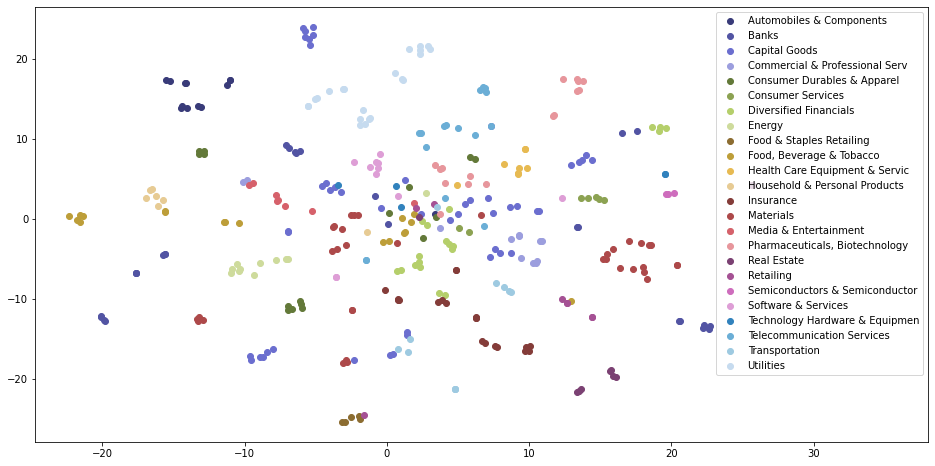

In [192]:
to_tsne = create_to_tsne_data(q2.index, data, True)
plot_tsne(to_tsne.iloc[:, :100], data)

### 4 The most heterogenous are Financials and Industrials, which are both Mr.Worldwide
### 5 The most homogenous are Utilities which purely form its own group without ever getting mixed in the middle. Although Energy and Real Estate are notable mentions.

### 6 One way to determine 'outliers' would be to see which companies tends to have an ill-defined clusters. These could be the one that tends to 'join up' with other clusters or those that appears in the center of T-SNE plot which seems to be reserved for the companies that can't be clustered. Financials and Industrials are often the outlier everywhere, which makes sense as both tends to have their cashflow dictated by other sector rather than their own (Financial and Industrial companies would be exposed to the risk factor of their clients). Materials are also similar in this regard, but not as bad.